[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# LSTM
This is a LSTM model module usage example. We implemented this model under the same API as NeuralProphet, for easy comparison of the results of NeuralProphet and SOTA models

LSTM model has analogous hyperparameters to NP:
* n_lags: defines the sequence length
* n_forecasts: defines how many timestamps in the future we predict
* num_hidden_layers: number of layers in LSTM
* d_hidden: dimension of hidden layers in LSTM

It shares the training configuration parameters with NP.

It also includes additional LSTM-specific parameters:
* lstm_bias = True,  If False, then the layer does not use bias weights b_ih and b_hh. Default: True
* lstm_biderectional = False, If True, becomes a bidirectional LSTM. Default: False

In [1]:
# install NeuralProphet from our repository
!pip install git+https://github.com/adasegroup/neural_prophet.git # may take a while

ERROR: Invalid requirement: '#'


In [1]:
import pandas as pd
import numpy as np
from neuralprophet import LSTM

In [2]:
if 'google.colab' in str(get_ipython()):
    data_location = "https://raw.githubusercontent.com/adasegroup/neural_prophet/master/"
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)
df = df.iloc[:1000]

In [3]:
m = LSTM(n_lags = 10,
            n_forecasts=3,
            num_hidden_layers=1,
            d_hidden=64,
            learning_rate=0.1,
            epochs=10,
            batch_size=None,
            loss_func="Huber",
            optimizer="AdamW",
            train_speed=None,
            normalize="auto",
            impute_missing=True,
            lstm_bias = True,
            lstm_bidirectional = False)

In [4]:
metrics_df = m.fit(df.iloc[:-10], freq = '5min', validate_each_epoch=True)

WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
  0%|                                                                                           | 0/10 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type         | Params
-------------------------------------------
0 | lstm      | LSTM         | 19.5 K
1 | linear    | Linear       | 195   
2 | loss_func | SmoothL1Loss | 0     
-------------------------------------------
19.7 K    Trainable params
0        

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [5]:
metrics_df

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,0.057615,8.748918,136.386193,0.266748,21.376663,639.590637
1,0.011943,4.231301,28.266555,0.024122,5.627751,57.090847
2,0.002983,2.072764,7.060207,0.006325,2.990292,14.968907
3,0.002302,1.716781,5.447637,0.002069,1.570651,4.897229
4,0.002098,1.614079,4.966482,0.001548,1.312027,3.664041
5,0.002009,1.613679,4.754490,0.002863,1.976514,6.775163
6,0.001836,1.513822,4.345537,0.001632,1.396642,3.861912
7,0.001615,1.396895,3.821093,0.001537,1.311312,3.636593
8,0.001477,1.333262,3.496112,0.001334,1.270925,3.158192
9,0.001289,1.254328,3.050433,0.001283,1.162927,3.036498


In [6]:
metrics = m.test(df.iloc[:-10])

WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)



Testing: 0it [00:00, ?it/s]

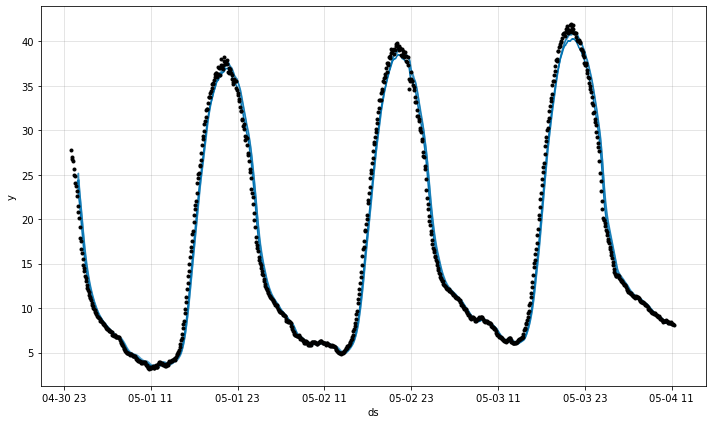

In [7]:
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

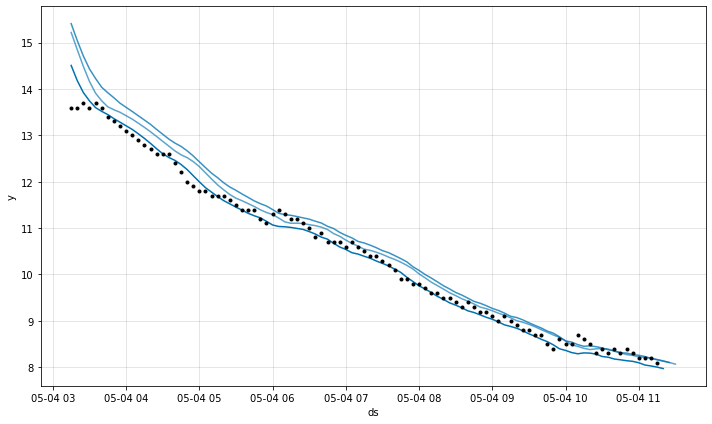

In [8]:
fig = m.plot(forecast.iloc[-100:])

## Multioutput forecasting plotting

In [9]:
m = LSTM(n_lags=6*12,
            n_forecasts=3*12,
            num_hidden_layers=1,
            d_hidden=64,
            learning_rate=0.1,
            epochs=10,
            batch_size=None,
            loss_func="Huber",
            optimizer="AdamW",
            train_speed=None,
            normalize="auto",
            impute_missing=True,
            lstm_bias = True,
            lstm_bidirectional = False)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - D:\ProgramData\anaconda3\envs\np2\lib\site-packages\pytorch_lightning\utilities\distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name      | Type         | Params
-------------------------------------------
0 | lstm      | LSTM         | 35.3 K
1 | linear    | Linear       | 2.3 K 
2 | loss_func | SmoothL1Loss | 0     
-------------------------------------------
37.7 K    Trainable params
0         Non-trainable params
37.7 K    Total params
0.151     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

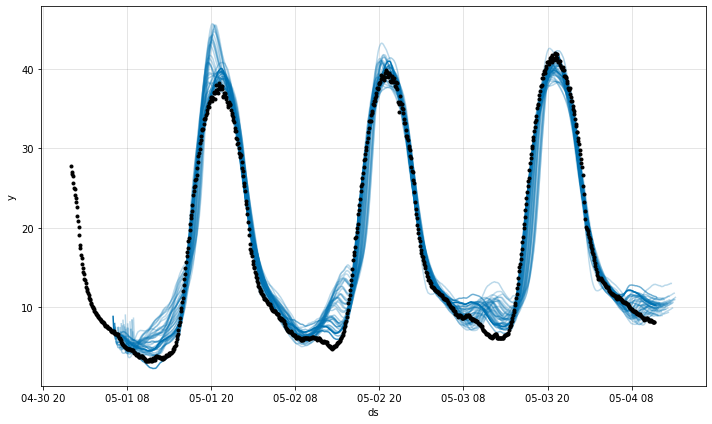

In [10]:
metrics = m.fit(df, freq='5min')
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

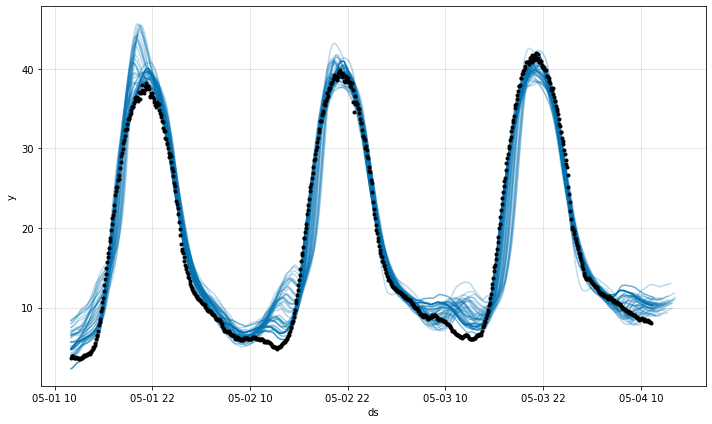

In [11]:
fig = m.plot(forecast[144:6*288])